<a href="https://colab.research.google.com/github/dustinak80/Deep_Learning/blob/master/Copy_of_MATH6373_HW2_Duong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
#import packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from numpy.random import seed
seed(6373)
tf.random.set_seed(6373)

# 1. Data Exploration

In [39]:
#Read input file
df_train=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/train.csv',
                    delimiter=",", dtype='float32',skiprows=1)
df_train[:5,:10]

array([[0.96880734, 0.89724773, 0.37431192, 0.        , 0.07339449,
        0.18715596, 0.23302752, 0.27522936, 0.27706423, 0.27155963],
       [1.        , 0.82451254, 0.47632313, 0.00557103, 0.17270195,
        0.3091922 , 0.40389973, 0.40389973, 0.4317549 , 0.42339832],
       [1.        , 0.5218855 , 0.03030303, 0.11111111, 0.10437711,
        0.11447811, 0.1010101 , 0.11447811, 0.1010101 , 0.10774411],
       [1.        , 0.5359712 , 0.5611511 , 0.57194245, 0.5683453 ,
        0.5215827 , 0.528777  , 0.47841728, 0.34172663, 0.19784173],
       [0.9866221 , 0.93534005, 0.8762542 , 0.8037904 , 0.7212932 ,
        0.6098105 , 0.49275362, 0.3522854 , 0.24972129, 0.17948718]],
      dtype=float32)

In [40]:
df_test=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/test.csv',
                   delimiter=",", dtype='float32',skiprows=1)
df_test[:5,:10]

array([[0.9662309 , 0.92156863, 0.8649238 , 0.8137255 , 0.72331154,
        0.6383442 , 0.5217865 , 0.39978212, 0.2788671 , 0.22004357],
       [0.87946427, 0.828125  , 0.74553573, 0.57589287, 0.41964287,
        0.3392857 , 0.33035713, 0.35714287, 0.4642857 , 0.39285713],
       [1.        , 0.92167103, 0.78851175, 0.31853786, 0.11488251,
        0.15665796, 0.16449086, 0.07310705, 0.06005222, 0.05744125],
       [0.8844847 , 0.8278596 , 0.7734994 , 0.7191393 , 0.6455266 ,
        0.5549264 , 0.4450736 , 0.33861834, 0.23216309, 0.17667045],
       [0.5862069 , 0.12539186, 0.        , 0.11285266, 0.1630094 ,
        0.12852664, 0.169279  , 0.1661442 , 0.20689656, 0.24451411]],
      dtype=float32)

In [41]:
# change the label to  0, 1, and 2
import seaborn as sns
y_train=df_train[:,187].copy()
y_train[y_train==4]=1
y_train=y_train.astype('int8')
#sns.distplot(y_train)
#plt.show()
#plt.hist(y_train)
#plt.show()
y_train[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 2], dtype=int8)

In [42]:
# apply the same thing for test set
y_test=df_test[:,187].copy()
y_test[y_test==4]=1
y_test=y_test.astype('int8')
#sns.distplot(y_test)
#plt.show()
#plt.hist(y_test)
#plt.show()
y_test[:10]

array([1, 2, 0, 1, 0, 2, 1, 0, 1, 0], dtype=int8)

In [43]:
X_train=df_train[:,:187].copy()
print(df_train.shape)
print(X_train.shape)
X_test=df_test[:,:187].copy()
print(df_test.shape)
print(X_test.shape)

(14975, 188)
(14975, 187)
(3744, 188)
(3744, 187)


# 2. Define MLP structure


# 3. Select 2 tentative sizes h for the hidden layer

## 3.1. h95



0.9517220184206963
35


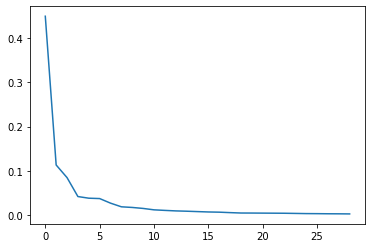

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # apply pca for 95%
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
#h95=pca.n_components_
h95 = 35
print(h95)

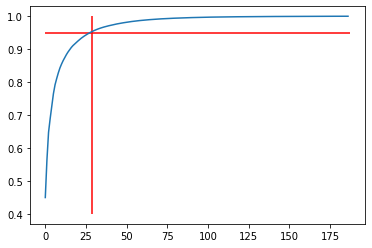

In [8]:
#Verify
pca = PCA(187)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95,0,187,'r')
plt.vlines(29,0.4,1,'r')
plt.show()

## 3.2 hL

In [44]:
hL= 93
#for i in range(3):
#  pca_Mij=PCA(0.95)
#  pca_Mij.fit(X_train[y_train==i,:])
#  hL+=pca_Mij.n_components_
#  print(hL)
hL

93

# 5. Impact of various learning options

-dimension h  of H   
-batch size  
-initialization  
-gradient descent step size  

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from time import time

In [0]:
#Just for running the def Model_Search() since I set these values equal to values
h = 35
Initializer = RandomNormal(mean=0.0, stddev=0.05, seed=6373)
B = 100
decay_rate = 0.4

In [0]:
### Use your own layer size and initializers. Refer to https://keras.io/initializers/. ####
def Model_Search(X_train, y_train, X_test, y_test, layerH_dim = h, Initializer = Initializer, B = B, decay_rate = decay_rate):
  
  #Build the Model for Keras
  layer1_dim=X_train.shape[1]
  layerH_dim=layerH_dim
  layer2_dim=3

  #D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

  # Setup the layer
  model = Sequential()

  # From layer 1 to layer H, we use RELU
  # the initial Weights and Thresholds are kernel and bias
  # Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
  model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

  # From layer H to 2, then softmax
  model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

  ###### Configure your own learning rate schedule and mini-batch size. #########

  # Choose batch size
  B = 100
  N=X_train.shape[0] # number of cases in train set
  # Our task is classification and we use cross entropy so
  loss_func = losses.CategoricalCrossentropy()

  # Define learning rate
  lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=np.exp(-decay_rate), 
                                                    staircase=True)

  # Because of using batch, Stochastic Gradient Descent optimizer is a must
  model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

  # For saving the best model during the whole training process.
  checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

  #### Interrupt training if `val_loss` stops improving for over 10 epochs #######
  stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
  # Save the weight at the end of each epoch
  #weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
  epo=100

  # Fit the model
  Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    verbose = 0
                    )
  
  return Monitor.history['loss'], Monitor.history['val_loss'], Monitor.history['accuracy'], Monitor.history['val_accuracy']

In [0]:
#plot
def plot(results):
  keys = results.keys()

  #determine amount of plots
  n = len(keys)
  fig1, ax1 = plt.subplots(n,1, figsize = (12, n*5))
  fig2,ax2 = plt.subplots(n,1, figsize = (12,n*5))

  #Plot the plots
  count = 0
  max_acc = 0
  for i in keys:
    ax1[count].plot(results[i]['loss'])
    ax1[count].set_xlabel('Epoch')
    ax1[count].set_ylabel('Average Cross Entropy')
    ax1[count].set_title('Loss for value {}'.format(i))
    
    ax2[count].plot(results[i]['accuracy'], c = 'b')
    ax2[count].plot(results[i]['val_accuracy'], c = 'r')
    ax2[count].set_xlabel('Epoch')
    ax2[count].set_ylabel('Average Accuracy')
    ax2[count].legend(['Train', 'Test'])
    ax2[count].set_title('Accuracy for value {}'.format(i))

    count += 1

    #Get the best key (using the highest accuracy)
    key_max = max(results[i]['val_accuracy'])
    if key_max > max_acc:
      max_acc = key_max
      best_key = i
  
  plt.show()
  return best_key

#### Get the Y values in proper format

In [0]:
# Convert labels to one hot encodings
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

### Hidden Layer Dimensions:

In [0]:
h=[35, 93]

h_results = {}
delta_times = []
for i in h:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim= i)
  h_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

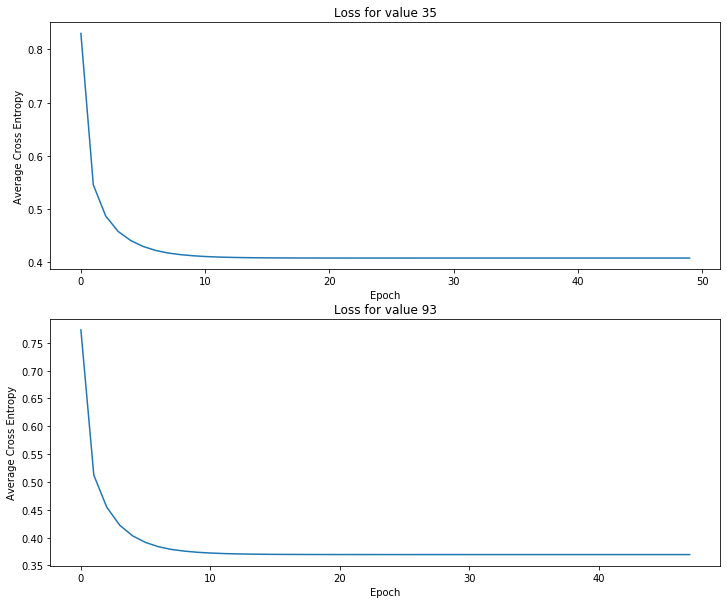

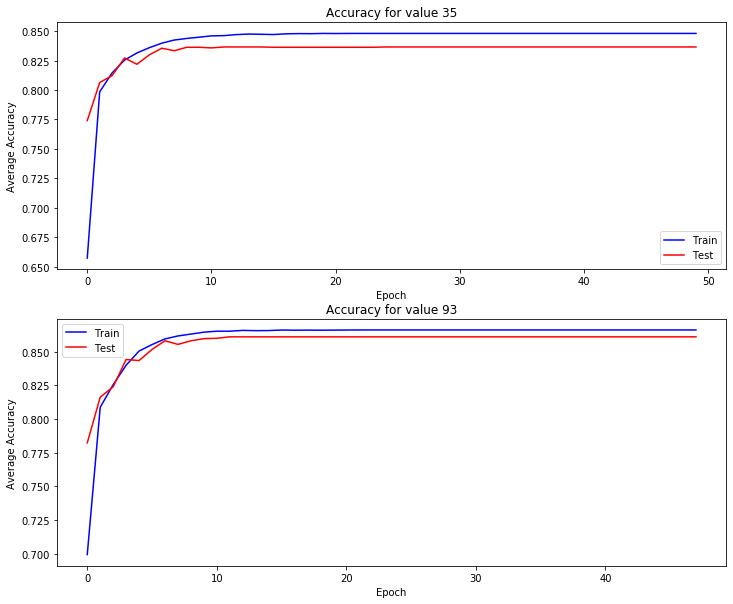

Number of Epochs: 48
Best Hidden Layer Dimension: 93
[14.61557388305664, 15.303131580352783]


In [56]:
best_h = plot(h_results)
print('Number of Epochs: {}\nBest Hidden Layer Dimension: {}'.format(len(h_results[i]['loss']), best_h))
print(delta_times)

In [0]:
##Run 1 for comparison of seed
#h_results[93]['loss']

In [0]:
##Run 2 for comparison of see
#h_results[93]['loss']

### Batch Size
-best Hidden Layer Dimension = 93 (50 Epochs before kicking out)

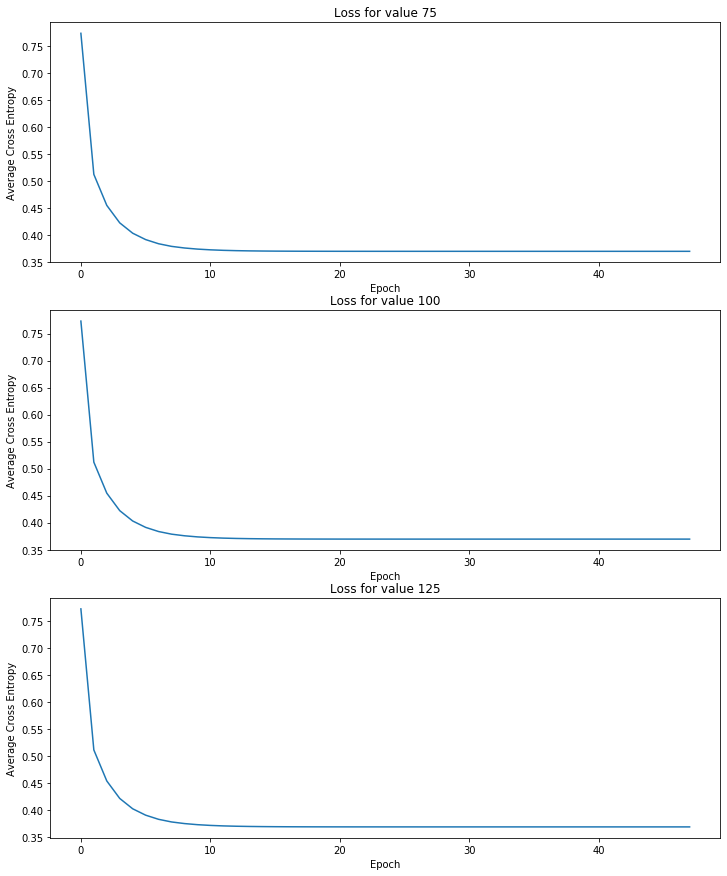

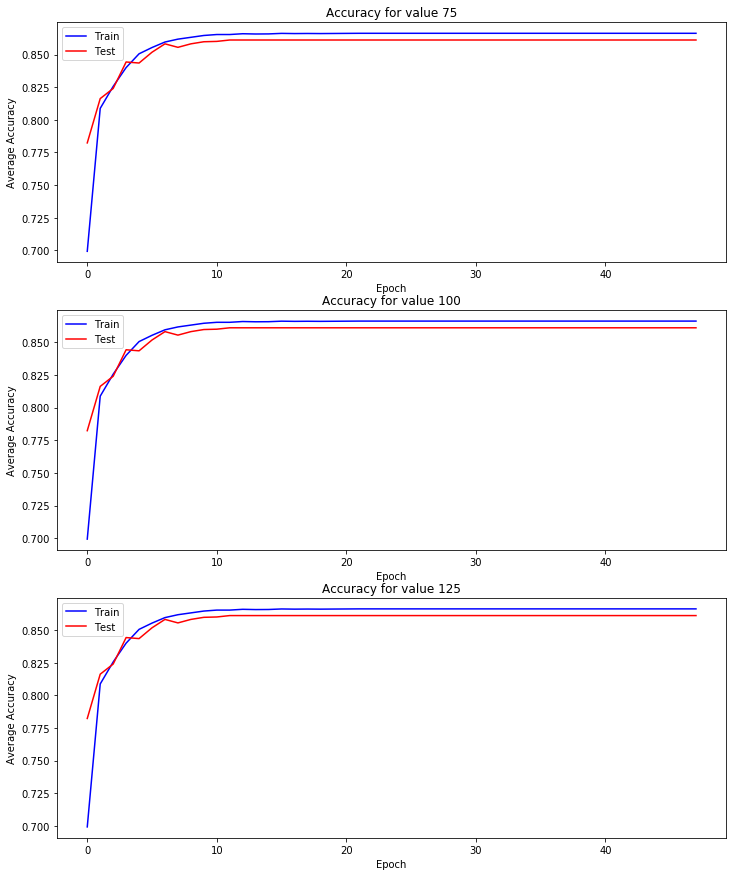

Number of Epochs: 48
Best Number of Batches Dimension: 75
[15.11152958869934, 15.10722804069519, 15.077592134475708]


In [58]:
#Play with Batch Values
B=[75, 100, 125]

B_results = {}
delta_times = []
for i in B:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = i)
  B_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

best_B = plot(B_results)
print('Number of Epochs: {}\nBest Number of Batches Dimension: {}'.format(len(B_results[i]['loss']), best_B))
print(delta_times)

### Best Initilization Results
-best Hidden Layer Dimension = 93  (50 Epochs before kicking out)  
-best batch values = 75 (with 48 Epochs before kicking out)  

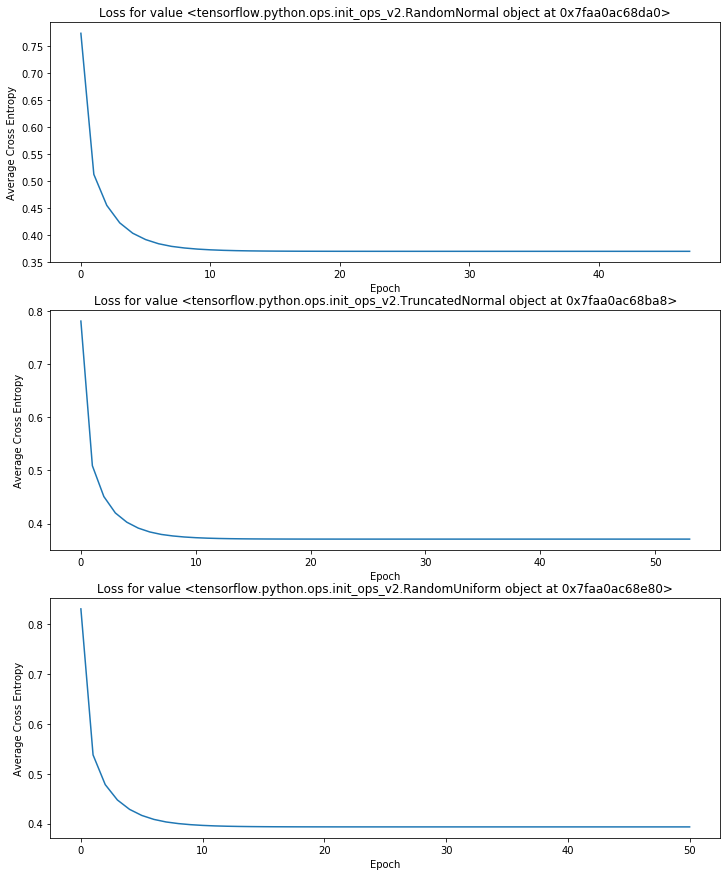

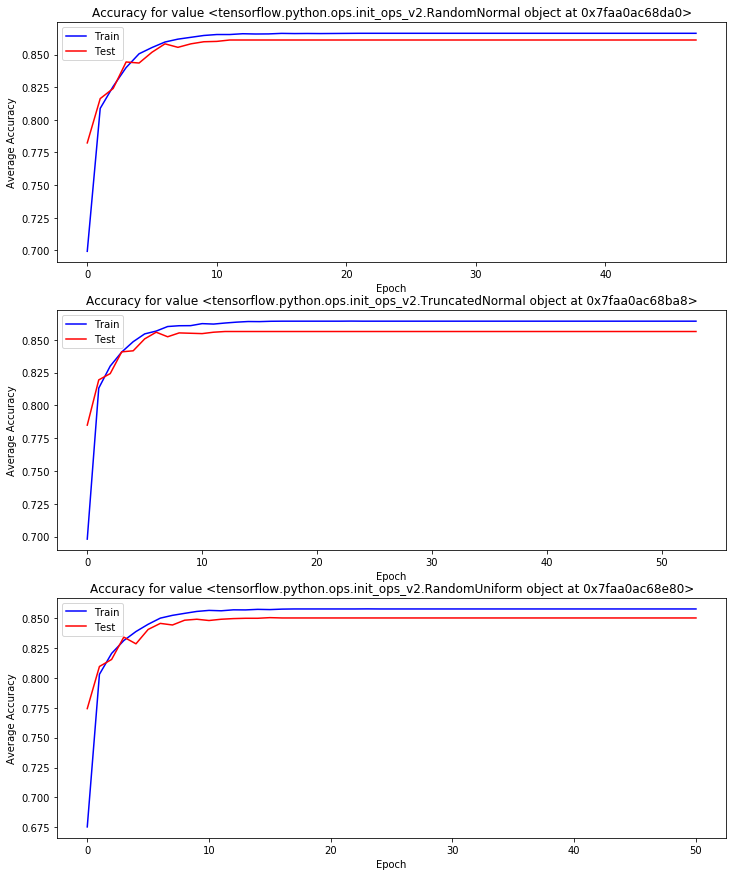

Number of Epochs: 51
Best Initialization Method Dimension: <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7faa0ac68da0>
[15.125930547714233, 16.66734790802002, 15.98002290725708]


In [59]:
#Play with Initialization Methods
Initializer = [RandomNormal(mean=0.0, stddev=0.05, seed=6373),
               TruncatedNormal(mean=0.0, stddev=0.05, seed=6373),
               RandomUniform(minval=-0.05, maxval=0.05, seed=6373)]

Init_results = {}
delta_times = []
for i in Initializer:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=i)
  Init_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_Init = plot(Init_results)
print('Number of Epochs: {}\nBest Initialization Method Dimension: {}'.format(len(Init_results[i]['loss']), best_Init))
print(delta_times)

### Best Decay Rate Results
-best Hidden Layer Dimension = 93  (50 Epochs before kicking out)  
-best batch values = 75 (48 Epochs before kicking out)  
-best initialization method for params = RandomNormal (51 Epochs before kicking out)

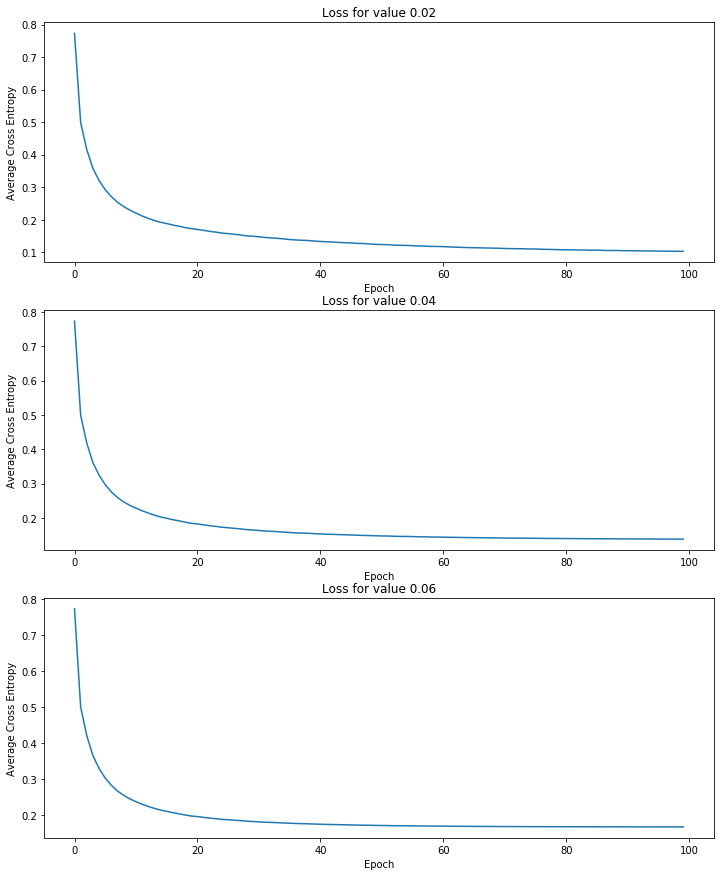

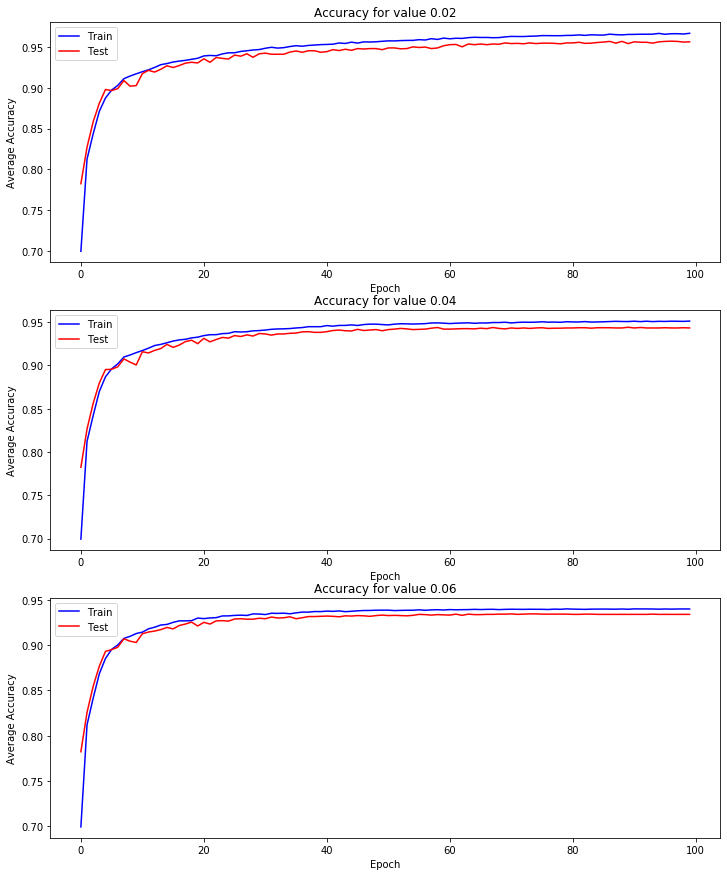

Number of Epochs: 100
Best Decay Rate Dimension: 0.02
[31.504657745361328, 30.88357639312744, 30.9600613117218]


In [60]:
#Play with Decay Rates
decay_rate = [.02, .04, .06]

decay_results = {}
delta_times = []
for i in decay_rate:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=best_Init, decay_rate = i)
  decay_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_decay = plot(decay_results)
print('Number of Epochs: {}\nBest Decay Rate Dimension: {}'.format(len(decay_results[i]['loss']), best_decay))
print(delta_times)

### Best Parameters
-best Hidden Layer Dimension = 93  (50 Epochs before kicking out)  
-best batch values = 75 (with 48 Epochs before kicking out)  
-best initialization method for params = RandomNormal (51 Epochs before kicking out)  
-best decay rate = 0.02 (Using all 100 Epochs)

# 4. Implementation

### Using the best results showed earlier in the search pattern

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal

# Use your own layer size and initializers. Refer to https://keras.io/initializers/.
layer1_dim=X_train.shape[1]
layerH_dim=best_h
layer2_dim=3

D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

# Setup the layer
model = Sequential()

#Edit the initializers
Initializer = best_Init

# From layer 1 to layer H, we use RELU
# the initial Weights and Thresholds are kernel and bias
# Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

# From layer H to 2, then softmax
model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

#### learning rate with exponetial decay 

- initial_learning_rate: A scalar float32 or float64 Tensor or a Python number. The initial learning rate.
- decay_steps: A scalar int32 or int64 Tensor or a Python number. Must be positive. See the decay computation above.
- decay_rate: A scalar float32 or float64 Tensor or a Python number. The decay rate.
- staircase: Boolean. If True decay the learning rate at discrete intervals
name: String. Optional name of the operation. Defaults to 'ExponentialDecay'.

In [0]:
from tensorflow.keras import optimizers, losses

# Configure your own learning rate schedule and mini-batch size.

# Choose batch size
B = best_B
N=X_train.shape[0] # number of cases in train set
# Set Decay Rate 
decay_rate = np.exp(-best_decay)
# Our task is classification and we use cross entropy so
loss_func = losses.CategoricalCrossentropy()

# Define learning rate
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=decay_rate, 
                                                    staircase=True)

# Because of using batch, Stochastic Gradient Descent optimizer is a must
model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

 We will choose metrics later
 

In [0]:
from tensorflow.keras import callbacks

# For recording gradients and training loss over the whole training set
# at the end of each epoch.

class MyHistory(callbacks.Callback):
    # Set empty list for values we want to retrieve at the begining
    def on_train_begin(self, logs={}):
        self.grads = []
        self.gradsNorm = []
        self.train_loss = []
        self.test_loss = []
        self.weight=[]
        self.WC = []
        #Track some of the batch values
        self.bW = []
        self.b_WC = [] #change in weight size for every batch (page 3)
        self.bavCRE = [] #loss for each batch (page 3)
        self.bG = [] # batch Gradiend Descent (end of page 2)
        self.bGD = [] # Wants Size of batch gradient plotted each batch (page 3)

    # Define what values to keep at the end of each batch
    def on_batch_end(self, batch, logs):
        
        #Get the Batch Average CRE (Loss)
        self.bavCRE.append(logs.get('loss')) #plot
        
        # Weight
        modelWeights = [] # Vector W at the batch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.bW.append(modelWeights)

        if len(self.bW)>2:
          diff = (self.bW[-1]- self.bW[-2])
          self.bG.append( diff / decay_rate )
          self.b_WC.append( np.linalg.norm(diff)/np.linalg.norm(self.bW[-1]) ) #Plot
          self.bGD.append( np.linalg.norm(self.bG[-1]) / np.sqrt(D) ) #plot

    # Define what values we want to retrieve at the ending of epoch
    def on_epoch_end(self, epoch, logs={}):

        # Define gradient or Gi
        with tf.GradientTape() as tape:
          #train set
          y_pred = self.model(X_train)
          loss_value = loss_func(y_train,y_pred) # avCRE
          #test set
          test_y_pred = self.model(X_test)
          test_loss_value = loss_func(y_test, test_y_pred)

        #WHAT IS THIS DOING???
        grad = tape.gradient(loss_value, model.trainable_weights) # gradient(avCRE,W)
        self.grads.append(grad)

        self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grad])))
        
        # Weight
        modelWeights = [] # Vector W at the Epoch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.weight.append(modelWeights)

        #Get the value of loss and store it
        self.train_loss.append(loss_value.numpy())
        self.test_loss.append(test_loss_value.numpy())

GradsReal_loss = MyHistory()

# For saving the best model during the whole training process.

checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

- Train the model and store validation loss history in 'Monitor'.
- Be carefual that in Keras, the "loss" of each epoch (stored in 'Monitor.history['loss']') is calculated as the average of the losses of mini-batches in that epoch - bavCREn. 
- Vector Gn is stored in GradsReal_loss.grads
- For the real epoch loss over the whole training set, use 'GradsReal_loss.real_loss' instead. This is avCRE
- But it is safe to use 'Monitor.history['val_loss']' for validation losses.

In [64]:
# Interrupt training if `val_loss` stops improving for over 10 epochs
stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
# Save the weight at the end of each epoch
#weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
epo=100

# Fit the model
Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[GradsReal_loss, checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    )

Train on 14975 samples, validate on 3744 samples
Epoch 1/100
14975/14975 [==============================] - 1s 81us/sample - loss: 0.7152 - accuracy: 0.7211 - val_loss: 0.5389 - val_accuracy: 0.7826
Epoch 2/100
14975/14975 [==============================] - 1s 67us/sample - loss: 0.4545 - accuracy: 0.8284 - val_loss: 0.4230 - val_accuracy: 0.8563
Epoch 3/100
14975/14975 [==============================] - 1s 64us/sample - loss: 0.3693 - accuracy: 0.8666 - val_loss: 0.3426 - val_accuracy: 0.8833
Epoch 4/100
14975/14975 [==============================] - 1s 64us/sample - loss: 0.3158 - accuracy: 0.8878 - val_loss: 0.3003 - val_accuracy: 0.8985
Epoch 5/100
14975/14975 [==============================] - 1s 64us/sample - loss: 0.2827 - accuracy: 0.9010 - val_loss: 0.2708 - val_accuracy: 0.9100
Epoch 6/100
14975/14975 [==============================] - 1s 61us/sample - loss: 0.2571 - accuracy: 0.9080 - val_loss: 0.2504 - val_accuracy: 0.9108
Epoch 7/100
14975/14975 [==========================

### Plotting the Loss at the end of each Batch (n)

Text(0.5, 1.0, 'Average Batch Cross Entropy')

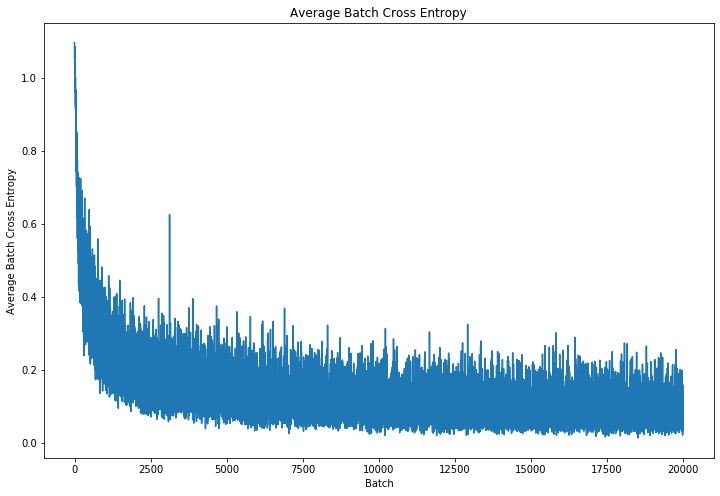

In [65]:
#At the end of each Batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bavCRE)
ax.set_xlabel('Batch')
ax.set_ylabel('Average Batch Cross Entropy')
ax.set_title('Average Batch Cross Entropy')

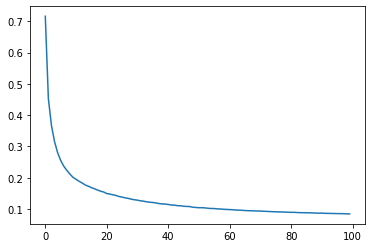

In [29]:
#At the end of each Epoch (m)
plt.plot(Monitor.history['loss']) #Loss of Training Set
#plt.plot(Monitor.history['val_loss']) #Validation Loss

### Plotting the size of weight change at the end of each Batch (n)

Text(0.5, 1.0, 'Average Size of Weight Change')

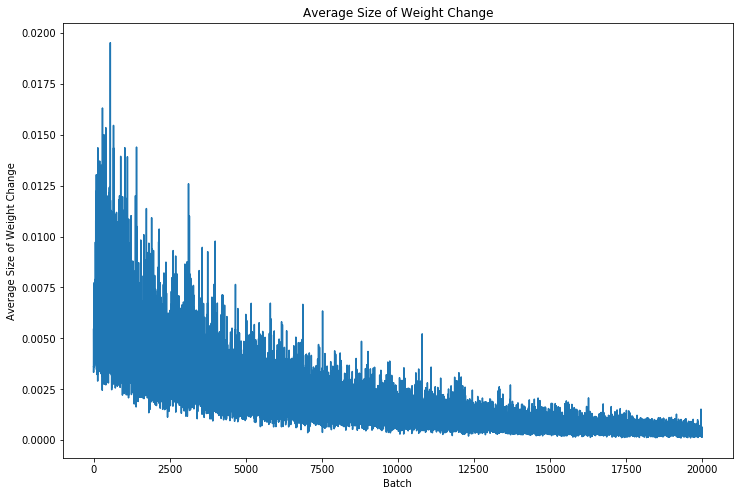

In [66]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.b_WC)
ax.set_xlabel('Batch')
ax.set_ylabel('Average Size of Weight Change')
ax.set_title('Average Size of Weight Change')

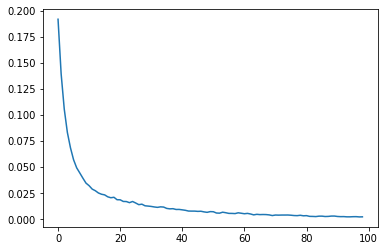

In [31]:
#At the end of Each Epoch(m)
from numpy import linalg as LA
def ratio(arr1,arr2):
  return(LA.norm(arr2-arr1)/LA.norm(arr1))
weight_ratio=[]
D=len(GradsReal_loss.weight[0])
epo_real=len(GradsReal_loss.weight) # the number of ran epoch
# it is <= epo because of interrupt learning
for i in range(epo_real-1):
  weight_ratio.append(ratio(GradsReal_loss.weight[i],GradsReal_loss.weight[i+1]))

plt.plot(weight_ratio)


### Plotting the ||G(n)||/d at the end of each Batch (n)

Text(0.5, 1.0, 'Average ||G(n)||/d per batch')

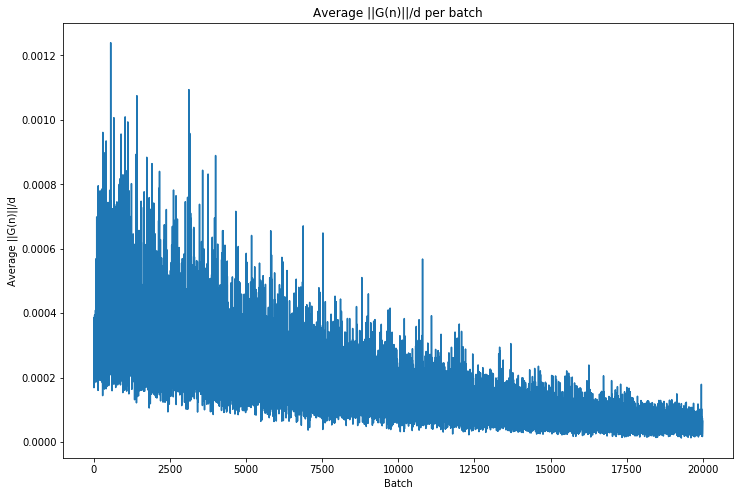

In [67]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bGD)
ax.set_xlabel('Batch')
ax.set_ylabel('Average ||G(n)||/d')
ax.set_title('Average ||G(n)||/d per batch')

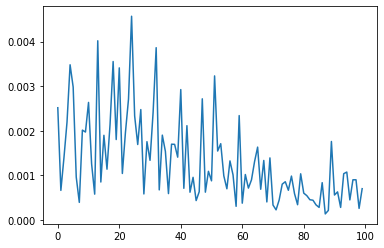

In [33]:
#At the end of each Epoch (m)
plt.plot(GradsReal_loss.gradsNorm/np.sqrt(D))

## Epoch Evaluations

val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data

In [0]:
#plt.plot(Monitor.history['accuracy']) #Accuracy of Training Set
#plt.plot(Monitor.history['val_accuracy']) #Accuracy of Validation Set

In [0]:
#plt.plot(GradsReal_loss.gradsNorm)

# 5. Performance analysis


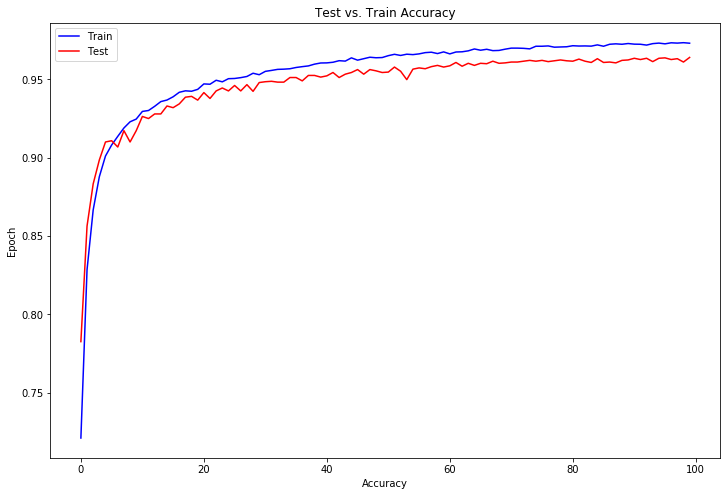

In [70]:
plt.figure(figsize = (12,8))
plt.plot(Monitor.history['accuracy'],color='blue',label='Train')
plt.plot(Monitor.history['val_accuracy'],color = 'red', label='Test')
plt.title('Test vs. Train Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend()
plt.show()

In [71]:
from tensorflow.keras.models import load_model

# Restore the best model and calculate confusion matrices.

model = load_model('BestModel.h5')
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cfm_train=tf.math.confusion_matrix(np.argmax(y_train, axis=1), 
                               np.argmax(y_train_pred, axis=1),                  
                               num_classes=3).numpy()

cfm_test=tf.math.confusion_matrix(np.argmax(y_test, axis=1), 
                               np.argmax(y_test_pred, axis=1),
                               num_classes=3).numpy()
print(cfm_train)
print(cfm_test)
# Access gradients history by 'GradsReal_loss.grads' and 'GradsReal_loss.gradsNorm'.

[[5089   41   70]
 [  85 5024   36]
 [ 140   23 4467]]
[[1254   18   28]
 [  26 1251    9]
 [  43   11 1104]]


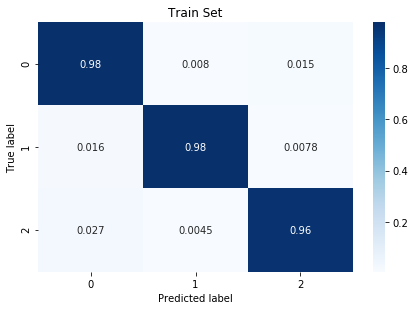

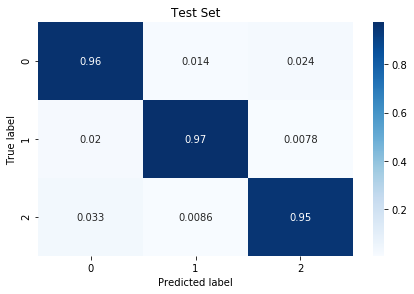

In [72]:
# a function to convert confusion matrix to percentage
def cfm2per(array):
  array=array/array.sum(axis=1)
  return(array)

# Turn to percentage and plot as heatmap
cfm_train=cfm2per(cfm_train)

sns.heatmap(cfm_train, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

cfm_test=cfm2per(cfm_test)

sns.heatmap(cfm_test, annot=True,cmap=plt.cm.Blues)
plt.title('Test Set')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 6. Analysis of hidden layer

Getting the values of the H_layer

In [224]:
Houtput = pd.DataFrame(model.layers[0](X_train).numpy())
abs(Houtput).sum()[abs(Houtput).sum() == 0]
#looks like 3 columns are completely 0
#Will have to fill the Nan values in correlation matrix

15    0.0
27    0.0
61    0.0
dtype: float32

In [225]:
Houtput.shape

(14975, 93)

### PCA portion

In [0]:
#Drop the columns with all 0 values
Houtput2 = Houtput.drop(columns = [15, 27,61])

In [229]:
H_corr = Houtput2.corr()
print(H_corr.shape)

(90, 90)


In [160]:
#Attempt to Fill the Nulls and get Eigs (didnt like the graph because last three values were one)
#H_corr null values at 15,27,61
#H_corr = H_corr.fillna(0)
#for i in [15, 27, 61]:
#  H_corr.loc[i,i] = 1

#H_corr.isnull().sum().sum()

0

In [238]:
#look at neurons with a correlation value greater than .90
top_tracker = {}
for i in range(len(H_corr+3)):
  if i in [15, 27, 61]:
    continue
  for j in range(len(H_corr+3)):
    if j in [15, 27, 61]:
      continue
    else:
      val = H_corr.loc[i,j]
    if val > .90:
      if val not in top_tracker.keys():
        top_tracker[val] = (i,j)

top_tracker.pop(1, None)
top_tracker

{0.9180883150931428: (18, 45),
 0.9189938997874838: (2, 33),
 0.9248932859863097: (50, 78),
 0.9265901568159268: (50, 69),
 0.9304733397519506: (41, 72),
 0.9309965719065106: (72, 80),
 0.9323116733253826: (18, 85),
 0.9533444942640208: (45, 85),
 0.9590655134192251: (73, 74),
 0.9593000246843041: (1, 60),
 0.983590680723904: (11, 38),
 0.9854483365470534: (69, 78),
 0.9856495921249123: (41, 80)}

In [239]:
#Look at max value of mean of correlation matrix. 
H_corr.mean().max()

0.0886599847302178

In [0]:
#Eigen Values and Vectors
H_eig, H_eig_v = np.linalg.eig(H_corr)
#ratio of variance explained
H_ratio = np.cumsum(H_eig)/np.sum(H_eig)

In [241]:
H_ratio

array([0.20602536, 0.32595281, 0.42523908, 0.48742804, 0.53671859,
       0.57825115, 0.6078449 , 0.62934788, 0.64844535, 0.66562464,
       0.68109585, 0.69615627, 0.71026984, 0.72333028, 0.73615986,
       0.74865523, 0.76068912, 0.77258613, 0.7839163 , 0.79510914,
       0.80626104, 0.81725266, 0.82806801, 0.83836966, 0.84891076,
       0.85788546, 0.86661675, 0.87626073, 0.88618498, 0.89606278,
       0.90381134, 0.91108679, 0.91788045, 0.92422255, 0.92983795,
       0.93524956, 0.94013966, 0.94476365, 0.949098  , 0.95313793,
       0.95674505, 0.96003748, 0.96323345, 0.9660993 , 0.96882832,
       0.97119212, 0.97328639, 0.97528962, 0.97712513, 0.97888603,
       0.98049366, 0.98199048, 0.98339961, 0.9846626 , 0.98591521,
       0.98704403, 0.98805492, 0.98902179, 0.98991148, 0.99074356,
       0.99153148, 0.99222707, 0.9929547 , 0.99355588, 0.99409148,
       0.99461505, 0.99510692, 0.99513497, 0.99518083, 0.99521713,
       0.99568855, 0.99612633, 0.99620436, 0.99658622, 0.99668

Variance Explained by Projecting onto first 3 is 0.43


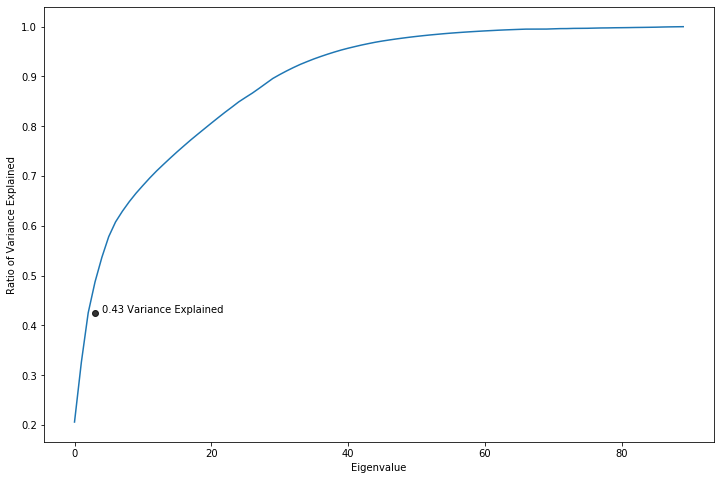

In [242]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(H_ratio)
ax.scatter(3, H_ratio[2], c = 'black', alpha = .8)
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Ratio of Variance Explained')
ax.text(x = 4, y = H_ratio[2], s = '{} Variance Explained'.format(round(H_ratio[2],2)))

print('Variance Explained by Projecting onto first 3 is {}'.format(round(H_ratio[2],2)))

In [0]:
#Project
proj = np.matmul(Houtput2, H_eig_v).iloc[:, 0:2]

#Get Index of different groups

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,52,53,54,55,56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92
0,0.0,0.000000,1.284244,0.010617,0.000000,0.211493,0.039639,0.0,0.019485,0.0,0.256011,0.000000,0.000000,0.021095,0.091157,0.000045,0.000000,0.342821,0.0,0.0,0.000000,1.189772,0.0,0.330375,0.008593,0.0,0.137620,0.000000,0.000000,0.071282,0.133165,0.544694,0.0,0.035769,0.000000,1.154748,0.000000,0.000000,0.000000,0.429645,...,0.260040,0.032919,0.511564,0.581281,0.0,0.0,0.228891,0.219714,0.0,0.000000,0.0,0.064260,0.000000,0.202926,0.0,0.0,0.761597,1.024063,0.430100,0.218251,0.000000,0.000000,1.310667,0.389429,0.000000,1.160620,0.496773,0.387990,0.0,0.000000,0.014133,0.0,0.466320,0.0,0.000000,0.000000,0.0,0.326902,0.218583,0.165834
1,0.0,0.000000,0.000000,0.000000,0.000000,1.343057,0.000000,0.0,0.014840,0.0,0.179898,0.000000,0.000000,0.000000,0.533635,0.000000,0.000000,0.766920,0.0,0.0,0.000000,0.546544,0.0,0.434402,0.183661,0.0,0.812282,0.000000,0.440009,0.581210,0.799664,0.000000,0.0,0.000000,0.564368,0.655118,0.000000,0.000000,0.000000,1.716302,...,1.007818,0.000000,0.000000,0.000000,0.0,0.0,1.583225,0.000000,0.0,0.412726,0.0,0.312760,0.000000,0.000000,0.0,0.0,0.552683,0.792130,0.617990,1.556720,0.431902,0.273043,0.488051,0.000000,0.000000,1.004472,0.000000,1.807737,0.0,0.000000,0.656963,0.0,1.218923,0.0,0.000000,0.000000,0.0,0.569585,1.556432,0.000000
2,0.0,0.000000,0.045882,0.024224,0.000000,1.154835,0.161543,0.0,0.002919,0.0,0.000000,0.000000,0.055938,0.000000,0.440470,0.493032,0.379676,0.564140,0.0,0.0,0.000000,0.107897,0.0,0.347208,0.444882,0.0,0.000000,0.000000,0.746557,0.469484,0.417121,0.000000,0.0,0.000000,1.425440,0.027096,0.000000,0.000000,0.000000,0.381219,...,0.000000,0.000000,0.177588,0.352233,0.0,0.0,0.275514,0.242927,0.0,0.041751,0.0,0.303576,0.000000,0.539624,0.0,0.0,0.502444,0.307697,0.210271,0.785969,0.000000,0.000000,0.459638,0.174269,0.047663,0.947933,0.000000,0.313075,0.0,0.000000,0.522779,0.0,0.778310,0.0,0.000000,0.000000,0.0,0.371843,1.400806,0.201649
3,0.0,0.157003,0.046908,0.016434,0.000000,1.409845,0.044548,0.0,0.000000,0.0,0.000000,0.316327,0.000000,0.000000,0.195147,0.482097,0.809892,0.868012,0.0,0.0,0.000000,0.000000,0.0,0.156963,0.209390,0.0,0.000000,0.061413,0.092464,0.000000,0.810641,0.000000,0.0,0.311786,2.252573,0.000000,0.270383,0.192744,0.000000,0.000000,...,0.000000,0.206289,0.032359,0.320459,0.0,0.0,0.819189,0.359908,0.0,0.246155,0.0,0.000000,0.000000,0.288252,0.0,0.0,0.986659,0.435244,0.264999,0.000000,0.000000,0.000000,0.429006,0.000000,0.000000,1.517009,0.000000,0.000000,0.0,0.066702,1.508491,0.0,1.199652,0.0,0.000000,0.000000,0.0,0.380276,0.404189,0.078177
4,0.0,0.000000,0.402909,0.000000,0.000000,0.000000,0.078074,0.0,0.000000,0.0,0.241414,2.705909,0.000000,0.000000,0.000000,0.900793,1.929437,1.077692,0.0,0.0,0.000000,0.718526,0.0,0.264187,0.130293,0.0,0.000000,0.119449,0.000000,0.000000,0.327568,0.080300,0.0,0.946255,0.899022,0.698257,1.558000,0.711021,0.000000,0.349611,...,0.084237,0.102508,0.171198,0.526929,0.0,0.0,1.512358,0.478362,0.0,0.000000,0.0,0.000000,0.000000,0.382210,0.0,0.0,1.525187,0.519198,0.593338,0.000000,0.000000,0.000000,0.866839,0.284472,0.000000,2.407053,0.765705,0.540646,0.0,0.000000,1.287558,0.0,1.549679,0.0,0.000000,0.000000,0.0,0.579170,0.000000,0.109777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,0.0,0.000000,0.000000,0.000000,0.000000,0.870162,0.097872,0.0,0.000000,0.0,0.379814,0.000000,0.000000,0.000000,0.440243,0.233972,0.000000,0.524687,0.0,0.0,0.202898,0.234831,0.0,0.209118,0.456461,0.0,0.127159,0.211761,0.551985,0.895853,1.139326,0.00000

In [126]:
print(id_tops)
print(tops)

[(0, 6), (0, 56), (0, 77), (0, 12), (0, 10), (0, 47), (0, 85), (0, 58), (0, 45), (0, 66), (1, 60), (1, 32), (1, 79), (1, 48), (1, 62), (1, 92), (1, 65), (1, 6), (1, 36), (1, 53), (2, 33), (2, 43), (2, 76), (2, 54), (2, 75), (2, 22), (2, 50), (2, 65), (2, 25), (2, 70)]
[0.5807068158912081, 0.5633366637565131, 0.5590253468381959, 0.5230241732223984, 0.454668711524629, 0.43764550197557456, 0.4300034264836806, 0.4293282142418137, 0.42344715727958115, 0.40459943365142836, 0.9593000246843041, 0.7919499120154331, 0.6730384815836553, 0.6099173041951391, 0.5286070481844265, 0.5266834010042933, 0.5039553819189729, 0.4758850296147734, 0.4699348343709231, 0.4360126156355263, 0.9189938997874838, 0.8291160280024021, 0.7673156410647121, 0.6509187643961593, 0.6067149579111637, 0.5857199877615431, 0.5811950221347753, 0.5653700278479217, 0.5545184360377993, 0.538720519209141]


In [111]:
len(H_corr)
abs(H_corr[i])

0     0.117535
1     0.021918
2     1.000000
3     0.351433
4     0.086750
        ...   
88    0.070178
89    0.055144
90    0.354644
91    0.526811
92    0.065587
Name: 2, Length: 93, dtype: float64

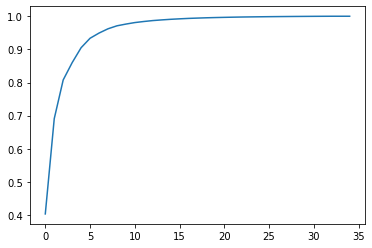

In [0]:
pca = PCA(35)
pca.fit(Houtput)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.hlines(0.95,0,187,'r')
#plt.vlines(29,0.4,1,'r')
plt.show()

In [0]:
# Average activities of H
label_train=np.argmax(y_train, axis=1)
PROF1=np.mean(Houtput[label_train==0],axis=0)
print(PROF1)

PROF2=np.mean(Houtput[label_train==1],axis=0)
print(PROF2)

PROF3=np.mean(Houtput[label_train==2],axis=0)
print(PROF3)

[6.0332540e-02 1.0683311e-01 1.1515111e+00 2.4421208e-01 3.1527048e-01
 1.8009378e-01 6.5384096e-01 3.1074697e-01 2.7237758e-01 1.4179669e-01
 9.4059892e-02 4.5910650e-01 1.1800803e-01 2.4752800e-01 3.4326028e-02
 4.6103689e-01 3.8365535e-02 7.1033667e-04 6.0239506e-01 4.8456624e-01
 4.5221275e-01 3.1241821e-02 1.0196911e-01 5.3534144e-01 1.7591673e-01
 1.3548668e-01 6.6425115e-02 7.1406936e-07 6.0843724e-01 1.1403856e+00
 1.0400292e+00 3.9704195e-01 9.4356024e-01 2.3599967e-02 3.5259810e-01]
[4.7253262e-02 6.8180613e-02 1.4130800e+00 1.2446252e-01 1.2056202e+00
 7.3761833e-01 3.2201383e-01 4.9178702e-01 2.1274881e-01 6.5944493e-01
 9.9380797e-01 2.3076122e-01 3.2660536e-02 7.6108629e-01 2.1102438e-02
 8.8506192e-01 2.9718282e-02 7.9874840e-04 6.0026002e-01 4.1498515e-01
 1.1938574e+00 8.1989681e-03 2.8321849e-02 4.6868172e-01 2.6902318e-01
 1.2599954e-01 3.4121692e-03 0.0000000e+00 7.4950069e-01 2.8351951e+00
 2.9109937e-01 8.2736619e-02 7.0483935e-01 1.7267722e-01 1.3177102e+00]
[4.3

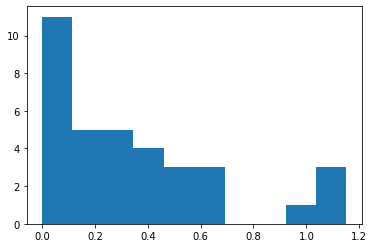

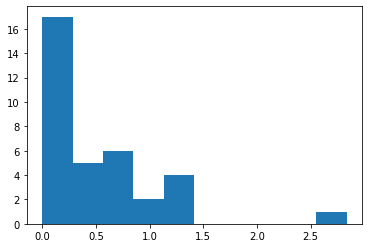

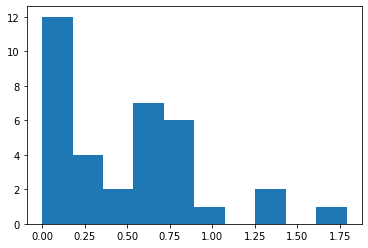

In [0]:
plt.hist(PROF1)
plt.show()
plt.hist(PROF2)
plt.show()
plt.hist(PROF3)
plt.show()

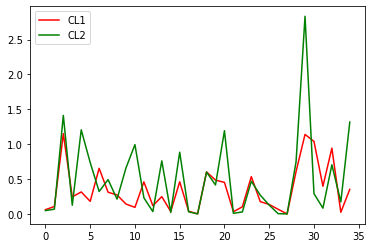

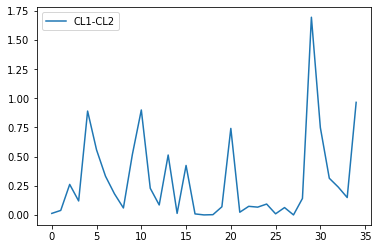

In [0]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF2,'green',label="CL2")
plt.legend()
plt.show()
plt.plot(np.abs(PROF1-PROF2),label="CL1-CL2")
plt.legend()
plt.show()


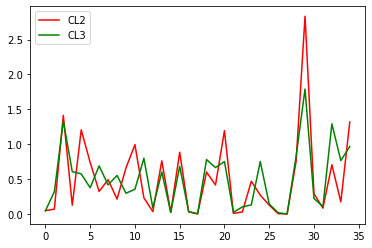

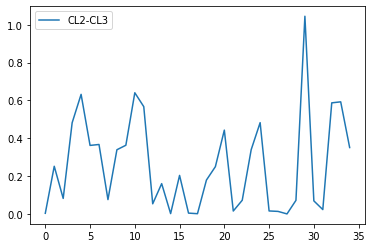

In [0]:
plt.plot(PROF2,'red',label="CL2")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
plt.plot(np.abs(PROF2-PROF3),label="CL2-CL3")
plt.legend()
plt.show()

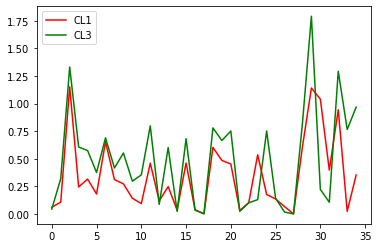

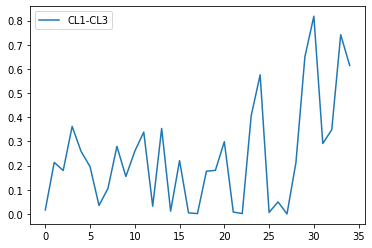

In [0]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
plt.plot(np.abs(PROF1-PROF3),label="CL1-CL3")
plt.legend()
plt.show()

### Plot gradient norm (per Epoch (m))


In [0]:
#top 10 correlation values, get the index.
import heapq #function that will get index of top n values
